### DM-08 Quiz

#### Import libraries  

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE

#### Load data and set parameters  

In [9]:
n_class = 10
digits_img = datasets.load_digits(n_class=n_class)
X_org = digits_img.data
digits = digits_img.target
print(X_org.shape)
print(digits.shape)

n_neighbors = 25
n_components = 2

(1797, 64)
(1797,)


In [10]:
color = range(0,10)

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X_org) 

ValueError: 'c' argument has 10 elements, which is inconsistent with 'x' and 'y' with size 1797.

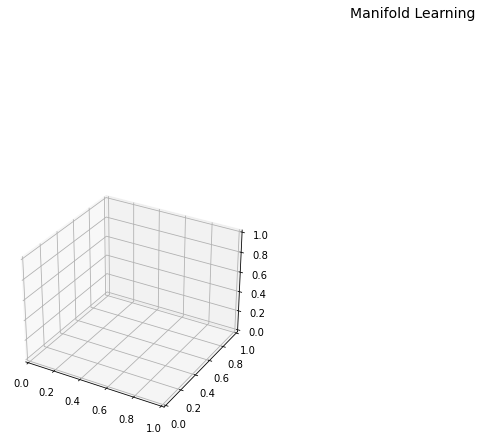

In [12]:
fig = plt.figure(figsize=(15, 15))
title = 'Manifold Learning'

plt.suptitle(title, fontsize=14)

# 3D s_curve
ax = fig.add_subplot(2,3,1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(4, -72)

# PCA
print('PCA ...')
t0 = time()
Y = PCA(n_components=n_components).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,2)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("PCA: {:.2f} sec".format(t1-t0))

# MDS
print('MDS ...')
t0 = time()
Y = MDS(n_components=n_components, random_state=0).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,3)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("MDS: {:.2f} sec".format(t1-t0))

# Isomap
print('Isomap ...')
t0 = time()
Y = Isomap(n_neighbors=n_neighbors, n_components=n_components).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,4)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("Isomap: {:.2f} sec".format(t1-t0))

# LLE
print('LLE ...')
t0 = time()
Y = LocallyLinearEmbedding(n_neighbors=n_neighbors,
                           n_components=n_components,
                           eigen_solver='auto',
                           method='standard').fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,5)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("standard LLE: {:.2f} sec".format(t1-t0))

# t-SNE
print('t-SNE ...')
t0 = time()
Y = TSNE(n_components=n_components,
         perplexity=30, n_iter=1000,
         random_state=0).fit_transform(X)
t1 = time()
ax = fig.add_subplot(2,3,6)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet)
plt.title("t-SNE: {:.2f} sec".format(t1-t0))

plt.show()